# 01 - Data Exploration: NASA CMAPSS Dataset
Explore the turbofan engine degradation simulation dataset from NASA. We'll analyze sensor readings over time and construct target labels.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

## Load CMAPSS Data (FD001 set)
[Link to data](https://data.nasa.gov/d/ff5v-kuh6) (download manually or place in `data/` folder)

In [6]:
df = pd.read_csv('../data/CMAPSSData/train_FD001.txt', sep=' ', header=None)
df.drop(columns=[26, 27], inplace=True)
df.columns = ['unit','cycle','op1','op2','op3'] + [f'sensor{i}' for i in range(1,22)]
df.head()

,unit,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## Basic Info and Distribution

In [7]:
print(df.shape)
print(df['unit'].nunique(), 'engines in dataset')
df.groupby('unit')['cycle'].max().describe()

(20631, 26)
100 engines in dataset


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

## Visualize Single Engine's Sensor Degradation

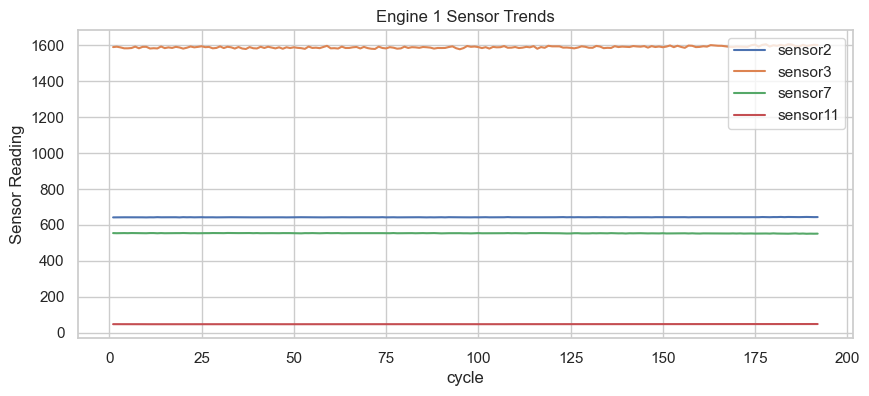

In [8]:
engine_id = 1
df1 = df[df['unit'] == engine_id]
df1.set_index('cycle')[['sensor2','sensor3','sensor7','sensor11']].plot(figsize=(10,4), title=f'Engine {engine_id} Sensor Trends')
plt.ylabel('Sensor Reading')
plt.show()

## Create Remaining Useful Life (RUL) Target

In [10]:
rul = df.groupby('unit')['cycle'].transform('max') - df['cycle']
df['RUL'] = rul
df[['unit','cycle','RUL']].head()


df.to_csv('../data/CMAPSSData/train_FD001_with_rul.csv', index=False)